In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv('insurance.csv')

In [7]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [8]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [9]:
x = df.drop('charges', axis = 1)
y = df['charges']


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [14]:
xgb_reg = XGBRegressor(objective = 'reg:squarederror')

In [15]:
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [16]:
y_pred = xgb_reg.predict(x_test)

In [17]:
y_pred

array([ 9384.525  ,  9008.653  , 29365.705  ,  9119.516  , 33360.406  ,
        7064.567  , -1051.6487 , 19416.902  ,  6463.4683 ,  9937.812  ,
       21531.756  ,  7820.02   ,  3564.421  , 45293.824  , 46669.84   ,
       48219.49   , 11421.855  , 41651.125  ,  8984.783  , 23068.02   ,
        2462.215  ,  7683.136  ,   464.45398,  2944.4956 , 12001.047  ,
       12557.939  , 14705.68   ,  5881.717  ,  9030.798  ,  8378.848  ,
        7189.229  , 10949.055  ,  1310.7362 ,  5564.0195 ,  2256.5571 ,
       11001.161  ,  2260.6592 ,  8354.93   , 23527.387  , 38217.793  ,
        5949.5435 ,  3342.3447 , 10831.637  , 14719.308  ,  9252.14   ,
       12786.331  , 20398.004  , 10648.731  , 40629.902  ,  7965.296  ,
       14233.085  ,  3340.8906 ,  5163.569  ,  1127.0784 , 12125.445  ,
       11788.831  ,  3228.3445 , 46707.996  , 12802.437  , 14097.601  ,
       13667.685  ,  6772.221  , 15427.564  , 11394.273  , 11164.849  ,
        6591.1514 , 18641.809  , 13351.29   ,  2032.4413 ,   201

In [18]:
mean_absolute_error(y_test, y_pred)

2765.7468132880863

In [19]:
r2_score(y_test, y_pred)

0.8490505887407566

In [20]:
#with hyperparameter tuning using GridSearchCV

In [28]:
xgb_reg = XGBRegressor(objective = 'reg:squarederror', random_state = 42)

In [29]:
parameter_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [3,5,7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]

}

In [30]:
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=parameter_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

In [31]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error', verbose=2)

In [32]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [33]:
xgb_reg_best = grid_search.best_estimator_

In [34]:
y_pred = xgb_reg_best.predict(x_test)

In [35]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 2481.052450451026
R2 Score: 0.8816336345809583


In [36]:
#feature importance visualization

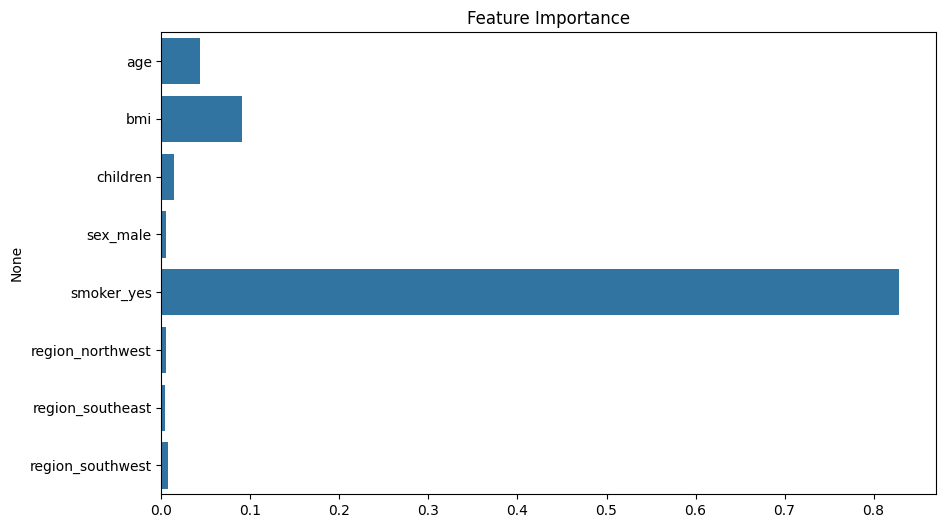

In [38]:
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
sns.barplot(x=xgb_reg_best.feature_importances_, y= x.columns)
plt.show()

In [39]:
print("Best Parameters:", grid_search.best_params_)
print("Model Performance")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Model Performance
MAE: 2481.052450451026
R2 Score: 0.8816336345809583


In [40]:
import pickle

In [42]:
with open('xgb_reg_best.pkl', 'wb') as file:
    pickle.dump(xgb_reg_best, file)